# Case Study:Effect of Holidays on US Births!
###### Saiful Islam
######Git:https://github.com/saifulislammithu/jupyter_project

# Birth Rate Data!

# Shell Command to download the data!
# !curl -0 https://github.com/jakevdp/data-CDCbirths/blob/master/births.csv

In [1]:
import pandas as pd
births=pd.read_csv('births.csv')


# births.head()

In [2]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


#### Add a decade column, and take a look at male and female births as a function of decade:

In [4]:
births['decade']=10*(births['year']//10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


# Births-Pivot Table:

In [7]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [6]:
births.pivot_table?

# Total number of US births by year and gender:

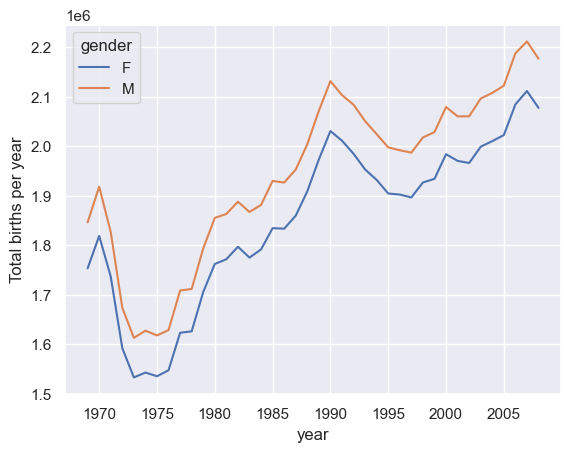

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('Total births per year')
plt.show()

In [8]:
import pandas as pd
import numpy as np
births=pd.read_csv('births.csv')
quartiles=np.percentile(births['births'],[25,50,75])
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])
sig

689.31

In [9]:
births=births.query?

In [11]:
births=births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


#  Set 'Day' Column to integer!

In [14]:
births['day']=births['day'].astype(int)
births.head()


,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [15]:
births['day']=births['day'].astype(int)
births.tail()

,year,month,day,gender,births
15062,1988,12,29,M,5944
15063,1988,12,30,F,5742
15064,1988,12,30,M,6095
15065,1988,12,31,F,4435
15066,1988,12,31,M,4698


# create a datetime index from the year,month,day!

###### Docstring:  
###### The day of the week with Monday=0, Sunday=6.

###### Return the day of the week. It is assumed the week starts on
###### Monday, which is denoted by 0 and ends on Sunday which is denoted
###### by 6.

In [31]:
births.index=pd.to_datetime(10000*births.year+100*births.month+births.day,format='%Y%m%d')
births['dayofweek']=births.index.dayofweek
births

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,3
1988-12-30,1988,12,30,F,5742,4
1988-12-30,1988,12,30,M,6095,4
1988-12-31,1988,12,31,F,4435,5


In [22]:
import pandas as pd
date=pd.to_datetime('4th of july,2015')
date

Timestamp('2015-07-04 00:00:00')

# Average daily births by day of week and decade!

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#from pandas.core.reshape.pivot import pivot_table
#births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
# births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
# plt.gca().set_xticklable(['Mon','Tues','wed','Thurs','Fri','sat','sun'])
# plt.ylabel('mean births by day')
births


,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,3
1988-12-30,1988,12,30,F,5742,4
1988-12-30,1988,12,30,M,6095,4
1988-12-31,1988,12,31,F,4435,5


In [45]:
births['decade']=10*(births['year']//10)
births.head()

,year,month,day,gender,births,dayofweek,decade
1969-01-01,1969,1,1,F,4046,2,1960
1969-01-01,1969,1,1,M,4440,2,1960
1969-01-02,1969,1,2,F,4454,3,1960
1969-01-02,1969,1,2,M,4548,3,1960
1969-01-03,1969,1,3,F,4548,4,1960


C:\Users\88019\AppData\Local\Temp\ipykernel_13060\1365408055.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon','Tues','wed','Thurs','Fri','sat','sun'])


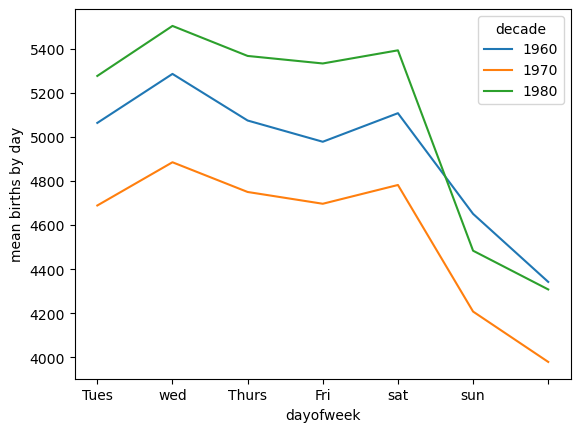

In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','wed','Thurs','Fri','sat','sun'])
plt.ylabel('mean births by day')
plt.show()